# dnb-bts

This notebook shows how to run the source codes used in the following work:

* Keiichi Koizumi, Makito Oku, Shusaku Hayashi, Akiko Inujima, Naotoshi Shibahara, Luonan Chen, Yoshiko Igarashi, Kazuyuki Tobe, Shigeru Saito, Makoto Kadowaki, Kazuyuki Aihara: "Suppression of dynamical network biomarker signals at the pre-disease state (*Mibyou*) before metabolic syndrome in mice by a traditional Japanese medicine (Kampo formula) bofutsushosan", submitted.

All the source files are in the scripts directory, and data files are in the data directory.

When you run the codes locally, please download gene expression data set GSE112653 from [Gene Expression Omnibus (GEO)](https://www.ncbi.nlm.nih.gov/geo/) database and put it into the data directory.

* direct link to [GSE112653](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE112653) (click Series Matrix Files(s))

## Preprocess (only for the first time)

*preprocess_GSE112653.py* is for preprocessing the gene expression data. It generates data.tsv under the data directory.

In [ ]:
%%capture
%cd scripts
%run -i preprocess_GSE112653.py

## Initialization
At first, run functions.py to import python packages and define some functions.

In [1]:
%%capture
%matplotlib inline
%cd scripts
%run -i functions.py
plt.plot([1,2]);  # I don't know why but this line is needed to show inline figures at least in my environment.

*load_data.py* is for loading gene expression data and other information, such as body weights.

In [2]:
%run -i load_data.py
display(data_df.head())  # gene expresison data (24217 x 64)
display(info_df.head())  # other information (64 x 7)

condition          TSNO                                                    \
week                  3         3         3         3         3         4   
gene_symbol                                                                 
0610005C13Rik -1.382570 -0.793170 -1.441071 -1.033032 -1.589348 -2.721230   
0610006L08Rik -8.659837 -8.513477 -9.360822 -9.239367 -8.817811 -8.846077   
0610009B22Rik  0.719277  0.674890  0.690189  0.616992  0.219670  0.844835   
0610009E02Rik -0.327852 -0.127477 -0.231089 -0.157693 -0.860221 -0.831569   
0610009K14Rik -6.765079 -9.031072 -7.947184 -8.620005 -7.612456 -8.340498   

condition                                                ...     TSOD-BTS  \
week                  4         4         4         4    ...            5   
gene_symbol                                              ...                
0610005C13Rik -2.150346 -2.261562 -1.933678 -2.481786    ...    -4.224038   
0610006L08Rik -8.747352 -8.969170 -8.060268 -9.337840    ...    -8.599013   
0610009B22Rik  0.815531  0.871093  0.880010  0.800610    ...     0.990791   
0610009E02Rik -0.608802 -0.667213 -0.608264 -0.597417    ...    -1.653949   
0610009K14Rik -8.591420 -9.028961 -7.178676 -9.068352    ...    -8.041228   

condition                                                                  \
week                  5         6         6         6         6         7   
gene_symbol                                                                 
0610005C13Rik -3.388322 -3.722719 -3.715980 -4.491958 -4.024051 -4.455942   
0610006L08Rik -7.655910 -8.858912 -8.701111 -8.853000 -8.417217 -8.676413   
0610009B22Rik  0.874146  0.768297  0.658263  0.785162  0.656274  0.858636   
0610009E02Rik -1.455994 -0.922951 -1.029957 -1.166246 -1.147664 -1.516300   
0610009K14Rik -7.244677 -8.906851 -8.545320 -8.913171 -8.435012 -8.505725   

condition                                    
week                  7         7         7  
gene_symbol                                  
0610005C13Rik -3.530719 -4.179020 -3.675682  
0610006L08Rik -8.548443 -8.629003 -8.580195  
0610009B22Rik  0.769627  0.708485  0.864110  
0610009E02Rik -1.063853 -1.170152 -1.366636  
0610009K14Rik -8.614285 -8.691499 -8.645505  

[5 rows x 64 columns]

,sample title,sample name,condition,week,body weight (g),blood sugar concentration (mg/dL),testicular fat mass (g)
0,TSNO-3W-1,AR1491_31,TSNO,3,10.3,137.0,0.02
1,TSNO-3W-2,AR1491_32,TSNO,3,9.0,121.0,0.01
2,TSNO-3W-3,AR1491_33,TSNO,3,9.4,117.0,0.02
3,TSNO-3W-4,AR1491_34,TSNO,3,10.4,115.0,0.01
4,TSNO-3W-5,AR1491_35,TSNO,3,9.2,119.0,0.01


## Figure 2
Figure 2 shows effects of BTS on TSOD mice. It consists of 4 panels.

*plot_fig02a.py* is for drawing Fig. 2A.

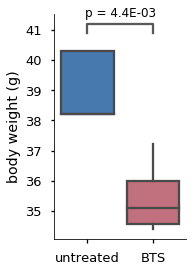

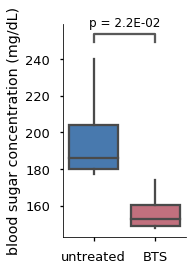

In [3]:
%run -i plot_fig02a.py

*plot_fig02b.py* is for drawing Fig. 2B.

4w:    11 genes
5w:    35 genes
6w:   340 genes
7w:   458 genes


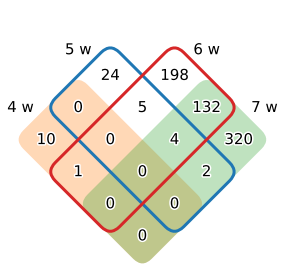

In [4]:
%run -i plot_fig02b.py

*plot_fig02c.py* is for drawing Fig. 2C. The position of the color scale was changed in the original figure.

The list of 537 genes belonging to the largest cluster is named as *gene_c1.txt*, and put into *deg_TSOD_BTS* directory under the data diretory.

cluster 1:  537 genes
cluster 2:   74 genes
cluster 3:   27 genes
cluster 4:   10 genes
cluster 5:    8 genes


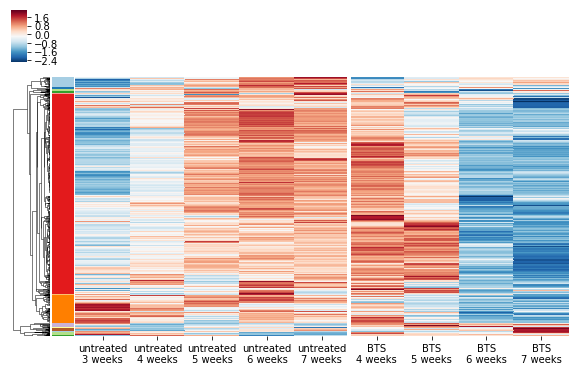

In [5]:
%run -i plot_fig02c.py

## Enrichment analysis
This study conducted enrichment analyses with respect to Gene Ontology (GO) and KEGG pathways. Figures 2D and 4B are results of GO enrichment analysis. The analysis was performed using [DAVID (Database for Annotation, Visualization and Integrated Discovery)](https://david.ncifcrf.gov/) database. This requires the following steps:

1. Output genes to files.
2. Upload each file to DAVID, do the analysis, and download the results.
3. Do some post-processing using python.

**The second step** is as follows:

* Go to [DAVID](https://david.ncifcrf.gov/).
* Select *Start Analysis* at the top menu.
* Select *Upload* at the left menu.
  * Step 1: Choose a gene list file.
  * Step 2: Select *OFFICIAL_GENE_SYMBOL*.
  * Step 3: Select *Gene List*.
  * Step 4: Click *Submit List*.
* If a warning message saying that "multiple species have been detected..." click *OK*.
* If an error message related to "Gene ID Conversion" appears, select *Option 1 (Recommended)*.
* Select *Mus Musculus* at the left panel and click *Select Species* (**don't forget it**).
* Check the right heading. If it is *Annotation Summary Results*, go to the next step. If it is *Analysis Wizard*, click *Functional Annotation Tool*.
* Check *Current Background*. If it is *Mus Musculus*, go to the next step. Otherwise, open *Background* tab at the left menu, select the correct species from the scrolling list, and click *Use* button.
* Choose from the two choices below depending on the type of annotation:
  * In the case of GO enrichment analysis, select *Gene_Ontology*, find *GOTERM_BP_DIRECT* in the list, and click the corresponding *Chart* button (**not the bar**).
  * In the case of KEGG pathway enrichment analysis, select *Pathways*, find *KEGG_PATHWAY* in the list, and click the corresponding *Chart* button (**not the bar**).
* In a new window, click *Options* to expand it. Set *EASE* (the threshold against raw p-values) to 1.0 in order to obtain all results, and click *Rerun Using Options*.
* Right click *Download File* and save it to a file.

The results of GO and KEGG pathway enrichment analyses for the largest cluster are named as *GO_c1_all.tsv* and *KEGG_c1_all.tsv*, respectively, and put into *deg_TSOD_BTS* directory under the *data* diretory.

**The third step** is done by *enrichment.py* and *plot_fig02d.py*.

*enrichment.py* takes one arguments:

* argument 1: name of a raw result file

It generates a formatted file, in which only annotations with q-values less than 0.05 are included. The annotations are also sorted in descending order of *Count*. The formatted files obtained from *GO_c1_all.tsv* and *KEGG_c1_all.tsv* are named as *GO_c1_fmt.tsv*
 and *KEGG_c1_fmt.tsv*, respectively, and put into *deg_TSOD_BTS* directory under the *data* diretory.
 
*plot_fig02d.py* takes four arguments:

* argument 1: name of a result file formatted by *enrichment.py*
* argument 2: figure width
* argument 3: figure height
* argument 5: text wrapping ('y' or 'n')

The following commands generate Fig. 2D.

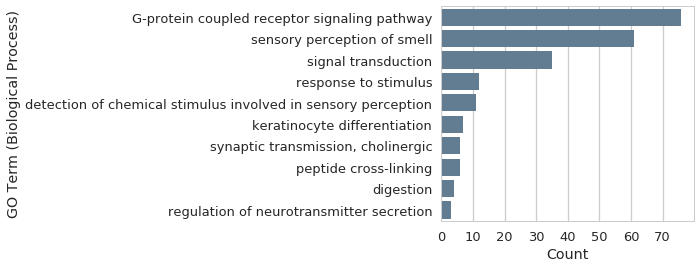

In [6]:
%run -i plot_fig02d.py ../data/deg_TSOD_BTS/GO_c1_fmt.tsv 10 4 n

## Figure 3
Figure 3 shows effects of BTS on DNB scores. It consists of two panels.

*plot_fig03.py* is for drawing Figs. 3A and 3B.

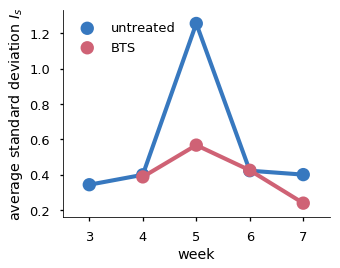

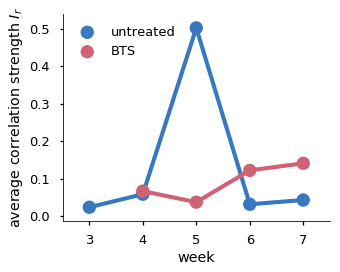

In [7]:
%run -i plot_fig03.py

## Figure 4
Figure 4 shows interactions between DNB genes and DEGs regulated by BTS. It consists of two panels.


### Network analysis
Network analysis was performed using [STRING (Search Tool for the Retrieval of Interacting Genes/Proteins)](https://string-db.org). This requires the following steps:

1. Output genes to files.
2. Upload each file to STRING and download the results.
3. Do some post-processing using python.

**The second step** is as follows:

* Go to [STRING v10.0](http://version10.string-db.org).
* Click *SEARCH*.
* Select *Multiple proteins* at the left menu.
  * Choose a gene list file.
  * Set *Organism* to *Mus Musculus*.
  * Click *SEARCH*.
* Click *CONTINUE*. Then, the network is displayed.
* Select *Tables/Exports*.
* Download a TSV (tab separated values) file.

The gene list consisting 123 DEGs and 147 DNBs (270 genes in total) and the network file are named as *gene_list.txt* and *network.tsv*, respectively, and put into *network* directory under the *data* diretory.

**The third step** is done by *plot_fig04a.py* as follows, which generates Fig. 4A.

['Dnajb8' 'ENSMUSG00000040163' 'ENSMUSG00000045330' 'Gm13308' 'H2-T3'
 'Ppyr1']


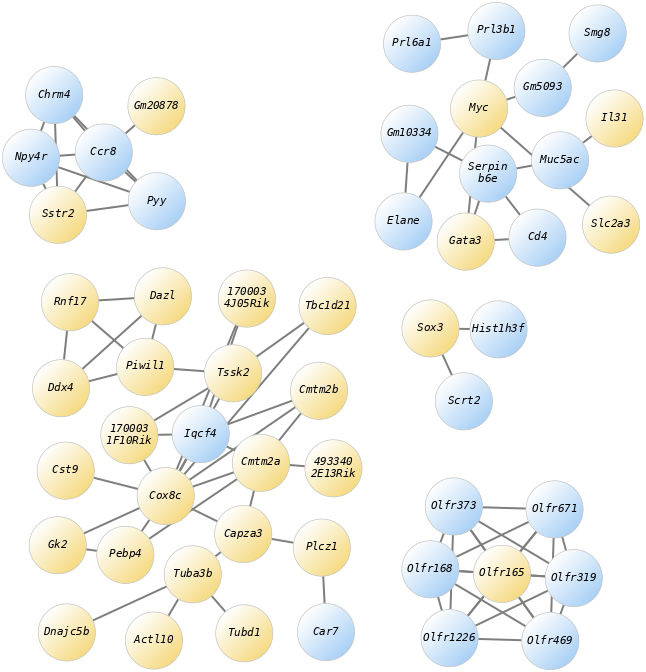

In [8]:
%run -i plot_fig04a.py ../data/network/network.tsv ../data/network/gene_list.txt
from IPython.display import Image, display_png
display_png(Image('tmp.png'))

For drawing Fig. 4B, *enrichment.py* and *plot_fig02d.py* are reused.

Related files are as follows:
* data/network/gene_subcluster.txt: list of genes in the upper right subcluster
* data/network/GO_subcluster_all.tsv: raw DAVID's result file for the subcluster
* data/network/GO_subcluster_fmt.tsv: formatted result file for the subcluster

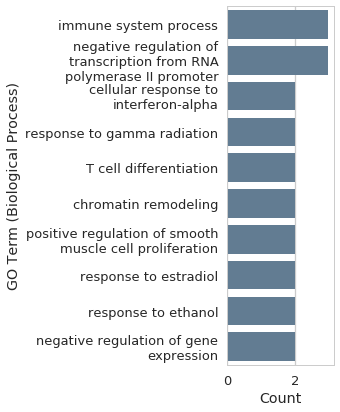

In [9]:
%run -i plot_fig02d.py ../data/network/GO_subcluster_fmt.tsv 5 6 y